1-Importando as bibliotecas necessárias

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

2-Carregando os dados da base pública do keras fashion mnist
 e já realizando a divisão entre dados de treino e dados de teste.

In [2]:
data = keras.datasets.fashion_mnist
((X_treino, X_identificacoes), (Y_teste, Y_identificacoes)) = data.load_data()


4431872/4422102 [==============================] - 0s 0us/step


#Analisando os dados

In [3]:
len(X_treino)


60000

In [4]:
X_treino.shape

(60000, 28, 28)

In [5]:
Y_teste.shape

(10000, 28, 28)

In [6]:
len(Y_identificacoes)

10000

In [7]:
X_identificacoes.min()

0

In [8]:
X_identificacoes.max()

9

Exibindo imagens

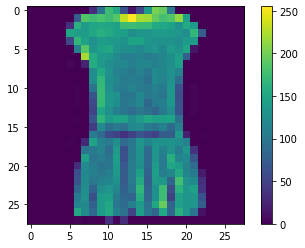

In [9]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(X_treino[3])
plt.colorbar()

Pré processamento normalizando os dados

In [10]:
X_treino = X_treino/float(255)

Experimento 1- normalizando com flatten,Uma camada densa com 256 neurônios, ativação com RELU, dropout de 0.2, e outra densa com 10 neurônios e ativação softmax.  Perda pela sparse_categorical_crossentropy. Métrica pela acurácia
Validação 10%, 10 épocas.

In [11]:
#rodando a primeira vez
model1 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model1.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(X_treino,X_identificacoes, epochs=10, validation_split=0.10)

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5172 - accuracy: 0.8155 - val_loss: 0.4303 - val_accuracy: 0.8442
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8571 - val_loss: 0.3555 - val_accuracy: 0.8713
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3588 - accuracy: 0.8706 - val_loss: 0.3465 - val_accuracy: 0.8742
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3350 - accuracy: 0.8775 - val_loss: 0.3402 - val_accuracy: 0.8780
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3208 - accuracy: 0.8801 - val_loss: 0.3314 - val_accuracy: 0.8812
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3063 - accuracy: 0.8880 - val_loss: 0.3228 - val_accuracy: 0.8817
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2972 - accuracy: 0.8913 - val_loss: 0.3374 - val_accuracy:

Salvando e carregando o modelo treinado

In [12]:
model1.save('modelo1.h5')
model1_saved = load_model('modelo1.h5')

#Avaliando o modelo 1
Primeira rodada alcançou acuracia de 0.869

In [13]:
perda_teste1, acuracia_teste1 = model1.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 1:', perda_teste1)
print('Acurácia do teste 1:', acuracia_teste1)

313/313 [==============================] - 1s 3ms/step - loss: 62.9356 - accuracy: 0.8619
Perda do teste 1: 62.93559265136719
Acurácia do teste 1: 0.8618999719619751


Modelo2 - Segunda Rodada

In [14]:
#rodando a segunda vez
model2 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(X_treino,X_identificacoes, epochs=10, validation_split=0.10)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5201 - accuracy: 0.8161 - val_loss: 0.4046 - val_accuracy: 0.8492
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3928 - accuracy: 0.8563 - val_loss: 0.3549 - val_accuracy: 0.8660
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8675 - val_loss: 0.3428 - val_accuracy: 0.8748
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.8761 - val_loss: 0.3647 - val_accuracy: 0.8713
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3186 - accuracy: 0.8813 - val_loss: 0.3506 - val_accuracy: 0.8712
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3086 - accuracy: 0.8851 - val_loss: 0.3330 - val_accuracy: 0.8810
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2974 - accuracy: 0.8903 - val_loss: 0.3296 - val_accuracy:

salvando e carregando o segundo modelo

In [15]:
model2.save('modelo2.h5')
model2_saved = load_model('modelo2.h5')

#Avaliando modelo2 
alcançou acurácia de 0.87

In [16]:
perda_teste2, acuracia_teste2 = model2.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 2:', perda_teste2)
print('Acurácia do teste 2:', acuracia_teste2)

313/313 [==============================] - 1s 2ms/step - loss: 56.6798 - accuracy: 0.8686
Perda do teste 2: 56.67978286743164
Acurácia do teste 2: 0.8686000108718872


modelo3 - Terceira Rodada

In [17]:
#rodando a segunda vez
model3 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model3.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(X_treino,X_identificacoes, epochs=10, validation_split=0.10)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5198 - accuracy: 0.8149 - val_loss: 0.4233 - val_accuracy: 0.8455
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3934 - accuracy: 0.8564 - val_loss: 0.3706 - val_accuracy: 0.8682
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3563 - accuracy: 0.8692 - val_loss: 0.3334 - val_accuracy: 0.8753
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3351 - accuracy: 0.8763 - val_loss: 0.3399 - val_accuracy: 0.8757
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3237 - accuracy: 0.8815 - val_loss: 0.3384 - val_accuracy: 0.8802
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3078 - accuracy: 0.8859 - val_loss: 0.3237 - val_accuracy: 0.8840
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.8897 - val_loss: 0.3376 - val_accuracy:

In [18]:
model3.save('modelo3.h5')
model3_saved = load_model('modelo3.h5')

In [19]:
perda_teste3, acuracia_teste3 = model3.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 3 :', perda_teste3)
print('Acurácia do teste 3:', acuracia_teste3)

313/313 [==============================] - 1s 3ms/step - loss: 52.0385 - accuracy: 0.8716
Perda do teste 3 : 52.038490295410156
Acurácia do teste 3: 0.8715999722480774


Visualizando as acurácias de treino e validação por época para o modelo 3 com melhor acuracia de 0,8716

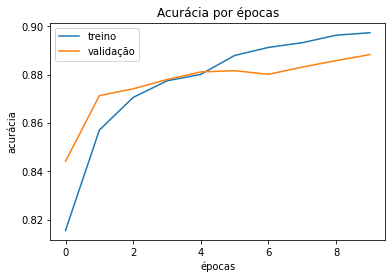

In [20]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época para o modelo 1

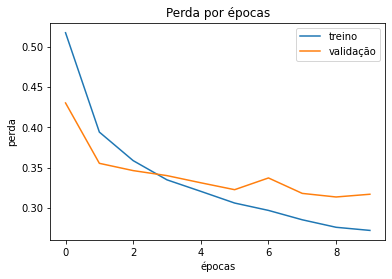

In [21]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo 1 e o modelo salvo

In [22]:
testes = model1.predict(Y_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', Y_identificacoes[1])

testes_modelo_salvo = model1_saved.predict(Y_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', Y_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: [[  0   0   0   0   0   0   0   0   0   0  13  67   0   0   0   0  50  38
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 120 209 226 247 237 255 255 255 247 238
  235 172  72   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 137 239 252 243 234 229 238 244 246 240 230 232
  239 248 251 194   0   0   0   0   0   0]
 [  0   0   0   0   0 102 255 231 228 227 228 233 230 230 229 228 232 232
  231 227 224 252 179   0   0   0   0   0]
 [  0   0   0   0   0 233 241 229 231 255 255 238 231 227 238 246 228 230
  227 234 235 229 241  20   0   0   0   0]
 [  0   0   0   0   0 248 241 231 255 149  47 252 228 255 242 216 238 232
  255 228 220 234 250  54   0   0   0   0]
 [  0   0   0   0   0 255 240 232 255  15   0 255 237 191   0   0 214 255
   13 123 255 234 252 114   0   0   0   0]
 [  0   0   0   0   6 255 238 239 255 177   0 255 255   0 130 116  47  65


Avaliando o experimento 1

In [25]:
#lista com as perdas e acurácias
perdas_exp1 = [perda_teste1, perda_teste2 , perda_teste3]
acuracias_exp1 = [acuracia_teste1, acuracia_teste2, acuracia_teste3]

In [26]:
print('Perda Média dos testes:', np.mean(perdas_exp1))
print('Acurácia Média dos testes:', np.mean(acuracias_exp1))

Perda Média dos testes: 57.21795527140299
Acurácia Média dos testes: 0.8673666516939799


Experimento 2- normalizando com flatten,Uma camada densa com 512 neurônios, ativação com RELU, dropout de 0.5, e outra densa com 10 neurônios e ativação softmax.  Perda pela sparse_categorical_crossentropy. Métrica pela acurácia
Validação 10%, 5 épocas.

In [27]:
#primeira vez
model4 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model4.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5608 - accuracy: 0.7992 - val_loss: 0.4129 - val_accuracy: 0.8475
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4435 - accuracy: 0.8380 - val_loss: 0.3812 - val_accuracy: 0.8570
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4094 - accuracy: 0.8490 - val_loss: 0.3813 - val_accuracy: 0.8527
Epoch 4/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3900 - accuracy: 0.8579 - val_loss: 0.3477 - val_accuracy: 0.8698
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3757 - accuracy: 0.8617 - val_loss: 0.3679 - val_accuracy: 0.8658


In [28]:
model4.save('modelo4.h5')
model4_saved = load_model('modelo4.h5')

In [29]:
perda_teste4, acuracia_teste4 = model4.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 4 :', perda_teste4)
print('Acurácia do teste 4:', acuracia_teste4)

313/313 [==============================] - 1s 4ms/step - loss: 73.9948 - accuracy: 0.8382
Perda do teste 4 : 73.99482727050781
Acurácia do teste 4: 0.8381999731063843


In [30]:
#segunda vez
model5 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model5.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history5 = model5.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5637 - accuracy: 0.7959 - val_loss: 0.4378 - val_accuracy: 0.8410
Epoch 2/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4401 - accuracy: 0.8408 - val_loss: 0.3838 - val_accuracy: 0.8553
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4117 - accuracy: 0.8500 - val_loss: 0.3742 - val_accuracy: 0.8680
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3895 - accuracy: 0.8563 - val_loss: 0.3600 - val_accuracy: 0.8725
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3751 - accuracy: 0.8611 - val_loss: 0.3464 - val_accuracy: 0.8727


In [31]:
model5.save('modelo5.h5')
model5_saved = load_model('modelo5.h5')

In [32]:
perda_teste5, acuracia_teste5 = model5.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 5 :', perda_teste5)
print('Acurácia do teste 5:', acuracia_teste5)

313/313 [==============================] - 1s 4ms/step - loss: 64.6887 - accuracy: 0.8448
Perda do teste 5 : 64.68872833251953
Acurácia do teste 5: 0.8447999954223633


In [33]:
#terceira vez
model6 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model6.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history6 = model6.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5654 - accuracy: 0.7973 - val_loss: 0.4471 - val_accuracy: 0.8232
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4408 - accuracy: 0.8401 - val_loss: 0.3730 - val_accuracy: 0.8655
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4098 - accuracy: 0.8494 - val_loss: 0.3845 - val_accuracy: 0.8633
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3863 - accuracy: 0.8598 - val_loss: 0.3631 - val_accuracy: 0.8697
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3754 - accuracy: 0.8631 - val_loss: 0.3521 - val_accuracy: 0.8707


In [34]:
model6.save('modelo6.h5')
model6_saved = load_model('modelo6.h5')

In [35]:
perda_teste6, acuracia_teste6 = model6.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 6 :', perda_teste6)
print('Acurácia do teste 6:', acuracia_teste6)

313/313 [==============================] - 1s 4ms/step - loss: 62.5488 - accuracy: 0.8437
Perda do teste 6 : 62.54879379272461
Acurácia do teste 6: 0.8436999917030334


In [36]:
#lista com as perdas e acurácias
perdas_exp2 = [perda_teste4, perda_teste5 , perda_teste6]
acuracias_exp2 = [acuracia_teste4, acuracia_teste5, acuracia_teste6]

In [37]:
#transformando as listas em arrays numpy
perdas_exp2 = np.array(perdas_exp2)
acuracias_exp2 = np.array(acuracias_exp2)

In [38]:
print('Perda Média dos testes:', np.mean(perdas_exp2))
print('Acurácia Média dos testes:', np.mean(acuracias_exp2))

Perda Média dos testes: 67.07744979858398
Acurácia Média dos testes: 0.8422333200772604


In [39]:
print('desvio padrão da Perda dos testes:', np.std(perdas_exp2))
print('desvio padrão da acurácia dos testes:',np.std(acuracias_exp2))

desvio padrão da Perda dos testes: 4.968729768962506
desvio padrão da acurácia dos testes: 0.002887145982481797


Experimento 3- Flatten, camada com com 768, droput de 0.2 e uma densa com 10 neurônios. Optimizador Gradiente descendente Estocástico. Perda pela sparse_categorical_crossentropy. Métrica pela acurácia
Validação 10%, 5 épocas.

In [40]:
#rodando pela primeira vez
model7 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(768, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history7 = model7.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7466 - accuracy: 0.7569 - val_loss: 0.5438 - val_accuracy: 0.8167
Epoch 2/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5253 - accuracy: 0.8230 - val_loss: 0.4737 - val_accuracy: 0.8338
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4763 - accuracy: 0.8361 - val_loss: 0.4522 - val_accuracy: 0.8388
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4476 - accuracy: 0.8471 - val_loss: 0.4275 - val_accuracy: 0.8505
Epoch 5/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4264 - accuracy: 0.8531 - val_loss: 0.4214 - val_accuracy: 0.8505


In [41]:
model7.save('modelo7.h5')
model7_saved = load_model('modelo7.h5')

In [42]:
perda_teste7, acuracia_teste7 = model7.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 7 :', perda_teste7)
print('Acurácia do teste 7:', acuracia_teste7)

313/313 [==============================] - 1s 4ms/step - loss: 58.2895 - accuracy: 0.8330
Perda do teste 7 : 58.28950500488281
Acurácia do teste 7: 0.8330000042915344


In [43]:
#rodando pela segunda vez
model8 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(768, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model8.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history8 = model8.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.7351 - accuracy: 0.7624 - val_loss: 0.5355 - val_accuracy: 0.8223
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5255 - accuracy: 0.8216 - val_loss: 0.4806 - val_accuracy: 0.8342
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4773 - accuracy: 0.8368 - val_loss: 0.4469 - val_accuracy: 0.8413
Epoch 4/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4494 - accuracy: 0.8435 - val_loss: 0.4299 - val_accuracy: 0.8463
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4279 - accuracy: 0.8517 - val_loss: 0.4118 - val_accuracy: 0.8560


In [44]:
model8.save('modelo8.h5')
model8_saved = load_model('modelo8.h5')

In [45]:
perda_teste8, acuracia_teste8 = model8.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 8 :', perda_teste8)
print('Acurácia do teste 8:', acuracia_teste8)

313/313 [==============================] - 1s 4ms/step - loss: 63.2872 - accuracy: 0.8254
Perda do teste 8 : 63.287174224853516
Acurácia do teste 8: 0.8253999948501587


In [46]:
#rodando pela terceira vez
model9 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(768, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model9.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history9 = model9.fit(X_treino,X_identificacoes, epochs=5, validation_split=0.10)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.7489 - accuracy: 0.7566 - val_loss: 0.5418 - val_accuracy: 0.8142
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5299 - accuracy: 0.8223 - val_loss: 0.4814 - val_accuracy: 0.8363
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4795 - accuracy: 0.8354 - val_loss: 0.4611 - val_accuracy: 0.8382
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4501 - accuracy: 0.8451 - val_loss: 0.4565 - val_accuracy: 0.8373
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4303 - accuracy: 0.8522 - val_loss: 0.4119 - val_accuracy: 0.8533


In [47]:
model9.save('modelo9.h5')
model9_saved = load_model('modelo9.h5')

In [48]:
perda_teste9, acuracia_teste9 = model9.evaluate(Y_teste, Y_identificacoes)
print('Perda do teste 9 :', perda_teste9)
print('Acurácia do teste 9:', acuracia_teste9)

313/313 [==============================] - 1s 4ms/step - loss: 66.8768 - accuracy: 0.8223
Perda do teste 9 : 66.87684631347656
Acurácia do teste 9: 0.8223000168800354


In [49]:
#lista com as perdas e acurácias
perdas_exp3 = [perda_teste7, perda_teste8 , perda_teste9]
acuracias_exp3 = [acuracia_teste7, acuracia_teste8, acuracia_teste9]

In [50]:
#transformando as listas em arrays numpy
perdas_exp3 = np.array(perdas_exp3)
acuracias_exp3 = np.array(acuracias_exp3)

In [51]:
print('Perda Média dos testes:', np.mean(perdas_exp3))
print('Acurácia Média dos testes:', np.mean(acuracias_exp3))

Perda Média dos testes: 62.81784184773763
Acurácia Média dos testes: 0.8269000053405762


In [52]:
print('desvio padrão da Perda dos testes:', np.std(perdas_exp3))
print('desvio padrão da acurácia dos testes:',np.std(acuracias_exp3))

desvio padrão da Perda dos testes: 3.521440268576395
desvio padrão da acurácia dos testes: 0.004495179362760457


#Avaliando a média e Desvios para todos os experimentos

In [53]:
perdas  = [perda_teste1, perda_teste2, perda_teste3, perda_teste4, perda_teste5 , perda_teste6, perda_teste7, perda_teste8, perda_teste9 ]
acuracias = [acuracia_teste1, acuracia_teste2, acuracia_teste3 , acuracia_teste4, acuracia_teste5, acuracia_teste6, acuracia_teste7, acuracia_teste8 , acuracia_teste9 ] 

In [54]:
perdas = np.array(perdas)
acuracias = np.array(acuracias)

In [55]:
print('Perda Média dos testes:', np.mean(perdas))
print('Acurácia Média dos testes:', np.mean(acuracias))

Perda Média dos testes: 62.3710823059082
Acurácia Média dos testes: 0.8454999923706055


In [56]:
print('desvio padrão da Perda dos testes:', np.std(perdas))
print('desvio padrão da acurácia dos testes:',np.std(acuracias))

desvio padrão da Perda dos testes: 5.942193172776376
desvio padrão da acurácia dos testes: 0.017124699119537134


#Acurácia média dos experimentos de 0.8455, bom resultado, e desvio padrão médio menor que 5%,  porém a loss média dos testes esta muito alta 62.37 com desvio médio da loss também muito alto 5.942, experimentos devem sem melhorados para obter menores desvio da loss , através da experimentação com outras funções de ativaçãoe outros otimizadores e mudança de função de perdas.

In [58]:
print('Perda Máxima dos testes:', np.max(perdas))
print('Acurácia Maxima dos testes:', np.max(acuracias))

Perda Máxima dos testes: 73.99482727050781
Acurácia Maxima dos testes: 0.8715999722480774


In [59]:
print('Perda Mínima dos testes:', np.min(perdas))
print('Acurácia Mínima dos testes:', np.min(acuracias))

Perda Mínima dos testes: 52.038490295410156
Acurácia Mínima dos testes: 0.8223000168800354


# As medidas acima revelam que em nossos experimentos obtivemos a acurácia máxima de 0.87, na primeira rodada do primeiro experimento, e perda máxima de 74 na primeira rodada do segundo experimento. Também significa que necessitamos de mais experimentação para obtermos menos perdas significativas e uma maior acurácia. Como obtivemos aumento na entropia conforme implemnetavamos mais vezes os modelos, compete alterar a função em outros experimentos futuros